# A/B TEST

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
control_grup = pd.read_excel("Data_Science_Case_Study.xlsx" ,sheet_name = "Control Group")

In [3]:
test_grup = pd.read_excel("Data_Science_Case_Study.xlsx" ,sheet_name = "Test Group")

In [4]:
control_grup.isnull().sum()

Campaign Name          1
Date                   2
Spend [USD]            2
# of Impressions       3
Reach                  3
# of Website Clicks    3
# of Searches          3
# of View Content      3
# of Add to Cart       3
# of Purchase          3
dtype: int64

In [5]:
control_grup.shape

(32, 10)

In [6]:
test_grup.shape

(30, 10)

In [7]:
#deneme = control_grup.iloc[:,2:10]

In [8]:
control_grup.drop(index =[30,31],inplace = True)

In [9]:
control_grup.shape

(30, 10)

In [10]:
control_grup.fillna(control_grup.mean(),inplace = True)

In [11]:
control_grup.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [391]:
control_grup.iloc[:,3:10].astype(int).dtypes

# of Impressions       int32
Reach                  int32
# of Website Clicks    int32
# of Searches          int32
# of View Content      int32
# of Add to Cart       int32
# of Purchase          int32
dtype: object

In [46]:
control_grup.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [47]:
test_grup.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


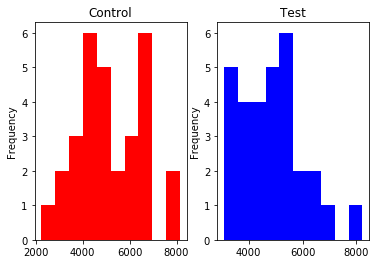

In [18]:
plt.title("Website Click Comparison")
plt.subplot(1, 2, 1)
plt.title("Control")
control_grup["# of Website Clicks"].plot.hist(color = "red")
plt.subplot(1, 2, 2)
plt.title("Test")
test_grup["# of Website Clicks"].plot.hist(color = "blue")
plt.show()


In [19]:
test_grup.mean()

Spend [USD]              2571.426085
# of Impressions       110497.300000
Reach                   88826.833333
# of Website Clicks      4863.866667
# of Searches            1862.433333
# of View Content        1457.600000
# of Add to Cart          885.333333
# of Purchase             486.066667
dtype: float64

In [21]:
control_grup.mean()

Spend [USD]              2481.788026
# of Impressions       114608.827586
Reach                   87628.482759
# of Website Clicks      5150.896552
# of Searches            2016.758621
# of View Content        1546.310345
# of Add to Cart         1061.862069
# of Purchase             507.379310
dtype: float64

col = control.columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
control_ = imputer.fit_transform(control)

control_pd = pd.DataFrame(control_, columns = col)

In [25]:
control_last =control_grup["# of Purchase"].astype(int)

In [26]:
test_gr = test_grup["# of Purchase"]

In [29]:
control_last.head()

0    383
1    644
2    639
3    649
4    455
Name: # of Purchase, dtype: int32

In [30]:
test_gr.head()

0    913
1    510
2    391
3    434
4    492
Name: # of Purchase, dtype: int64

In [31]:
df  = pd.DataFrame({"control":control_last,
                   "test":test_gr})

In [33]:
df.head()

,control,test
0,383,913
1,644,510
2,639,391
3,649,434
4,455,492


In [35]:
import scipy.stats as stats
import pylab

## Distribution for Control 

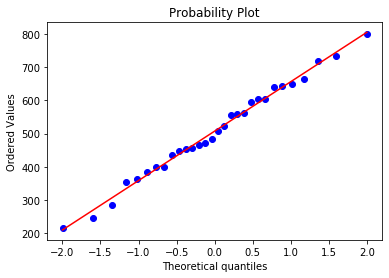

In [36]:
stats.probplot(df["control"], dist="norm", plot=pylab)
pylab.show()

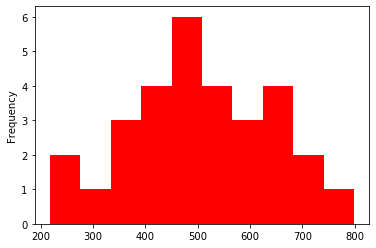

In [37]:
df["control"].plot.hist(color = "red");

## For Test

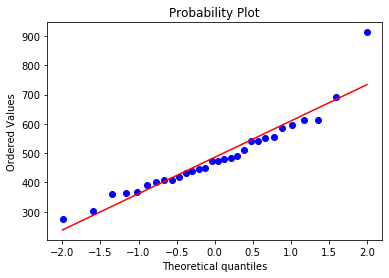

In [38]:
stats.probplot(df["test"], dist="norm", plot=pylab)
pylab.show()

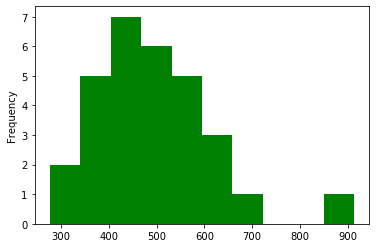

In [39]:
df["test"].plot.hist(color = "green");

for i in ["control","test"]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[i] > upper) | (df[i] < lower)].any(axis=None):
        print(i,"yes")
        print(df[(df[i] > upper) | (df[i] < lower)].shape[0])
    else:
        print(i, "no")

Q1 = df["test"].quantile(0.25)
Q3 = df["test"].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df[df["test"] > upper] = upper

In [429]:
df.head()

,control,test
0,757.5,757.5
1,644.0,510.0
2,639.0,391.0
3,649.0,434.0
4,455.0,492.0


## Determination of Hypothesis

H0 = avarage bidding = maximum bidding

H1 = is not equal

## Normality Assumption


In [40]:
from scipy.stats import shapiro

In [52]:
statistic, pvalue = shapiro(df.control)
print('Statistic = %.5f, p-value = %.5f' % (statistic, pvalue))

Statistic = 0.98821, p-value = 0.97879


p value > 0.05 h0 is not rejected for the control campaign


In [50]:
statistic, pvalue = shapiro(df.test)
print('Statistic = %.5f, p-value = %.5f' % (statistic, pvalue))

Statistic = 0.91887, p-value = 0.02507


In [51]:
0.02507 < 0.05

True

H0 is rejected. Therefore non-parametric test should be performed.

## Variance Homogeneity Assumption

HO : variance is homogeneus
    
H1 : is not

stats.levene(df.control,df.test)

Based on p value(0.251>0.05), variance is homogeneus

# Implementation of Hypothesis

test_istatistigi, pvalue =stats.ttest_ind(df["control"], df["test"], equal_var = True)

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

## NonParametric 

In [44]:
stats.mannwhitneyu(df["control"], df["test"])

MannwhitneyuResult(statistic=391.0, pvalue=0.19352350307853528)

0.1935235030 <0.05 # H0 is not rejected. There is no significant difference between avarage bidding and maximum bidding
